In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("indeed_reviews_ca.csv", index_col="id")
df["datetime"] = pd.to_datetime(df["datetime"])
print("Number of reviews: ", len(df))
df.sample(3)

Number of reviews:  4332


,title,text,rating,reviewer,location,cons,pros,datetime,reviewer_employee_type,job_work_and_life_balance_rating,compensation_and_benefits_rating,job_security_and_advancement_rating,management_rating,job_culture_rating,state,company,year,month,is_driver
id,,,,,,,,,,,,,,,,,,,
1dd4qvjkah3ql800,"Horrible pay, driver support and work/life bal...",Uber takes up to 50% of the fare it charges cu...,2,Rideshare Customer Service Specialist,"Benicia, CA","Pay, Support",Flexibility of hours,2019-06-11,Former Employee,2,1,1,1,1,ca,uber,2019,6,True
1dsvcf85cq59n801,Post mates is a good first job,A great first job really flexible schedule and...,3,Delivery Driver,"Lake Elsinore, CA",NaN,NaN,2019-12-25,Current Employee,3,2,2,2,2,ca,postmates,2019,12,True
1gellncpjj5ld800,profit,if gas is high you wont profit unless you get ...,3,Uber Driver,"Los Angeles, CA",NaN,NaN,2022-10-05,Current Employee,5,3,2,5,5,ca,uber,2022,10,True


In [25]:
compaies = ['uber', 'lyft', 'instacart', 'grubhub', 'doordash', 'postmates']

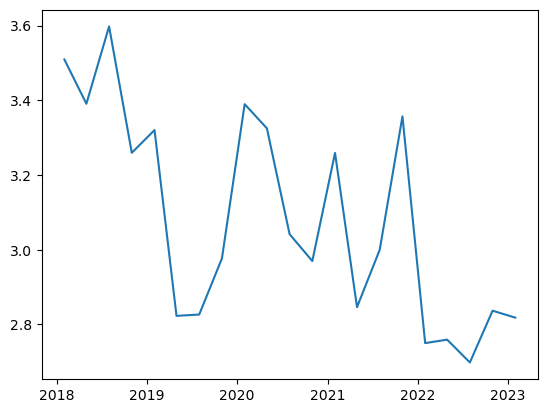

In [26]:
cols = ["rating", 'job_work_and_life_balance_rating', 'compensation_and_benefits_rating', 'job_security_and_advancement_rating', 'management_rating', 'job_culture_rating']
col = "job_culture_rating"
company = "uber"
tdf = df[(df[col] > 0) & (df["company"] == company)]
grouped = tdf[["datetime", col]].groupby(pd.Grouper(key='datetime', freq='3M')).mean()  # 'Q' stands for quarter
plt.plot(grouped.index, grouped[col])

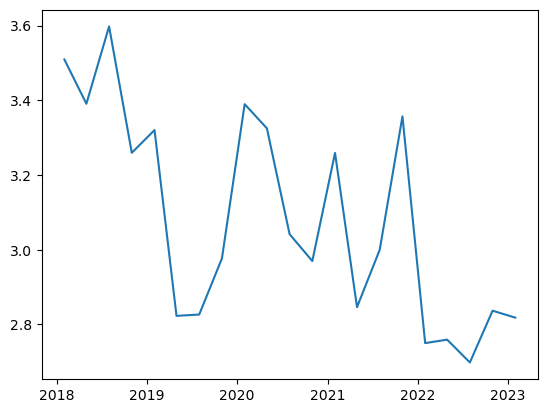

In [27]:
tdf = df[(df[col] > 0) & (df["company"] == company)]
grouped = tdf[["datetime", col]].groupby(pd.Grouper(key='datetime', freq='3M')).mean()  # 'Q' stands for quarter
plt.plot(grouped.index, grouped[col])

/tmp/ipykernel_14711/4036901385.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = company_data.groupby(pd.Grouper(key='datetime', freq='3M')).mean()  # 'Q' stands for quarter
/tmp/ipykernel_14711/4036901385.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = company_data.groupby(pd.Grouper(key='datetime', freq='3M')).mean()  # 'Q' stands for quarter
/tmp/ipykernel_14711/4036901385.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which

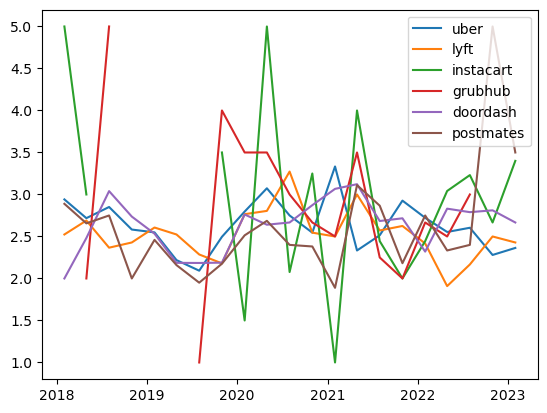

In [28]:
col = "compensation_and_benefits_rating"
companies = df["company"].unique().tolist()


for company in companies:
    company_data = df[df["company"] == company]
    company_data = company_data[company_data[col] != 0]
    grouped = company_data.groupby(pd.Grouper(key='datetime', freq='3M')).mean()  # 'Q' stands for quarter
    plt.plot(grouped.index, grouped[col], label=company)

plt.legend(loc='best')

In [136]:
grouped

,rating,job_work_and_life_balance_rating,compensation_and_benefits_rating,job_security_and_advancement_rating,management_rating,job_culture_rating,year,month,is_driver
datetime,,,,,,,,,
2018-03-31,3.608696,4.130435,2.391304,2.913043,3.347826,3.695652,2018.0,1.869565,1.0
2018-06-30,3.068966,3.896552,2.413793,2.689655,2.551724,3.068966,2018.0,4.620690,1.0
2018-09-30,4.028571,4.542857,2.942857,2.628571,3.057143,3.542857,2018.0,8.028571,1.0
2018-12-31,3.431818,3.522727,2.522727,2.590909,2.886364,3.204545,2018.0,11.000000,1.0
2019-03-31,3.000000,3.500000,2.250000,2.454545,2.681818,2.863636,2019.0,2.136364,1.0
2019-06-30,2.854545,3.345455,1.927273,2.109091,2.272727,2.527273,2019.0,5.072727,1.0
2019-09-30,2.906977,3.069767,1.883721,2.011628,2.151163,2.465116,2019.0,8.104651,1.0
2019-12-31,3.410714,3.517857,2.339286,2.535714,2.857143,2.839286,2019.0,11.107143,1.0
2020-03-31,3.500000,3.838235,2.602941,2.735294,2.941176,3.102941,2020.0,1.867647,1.0


<Axes: xlabel='year,month'>

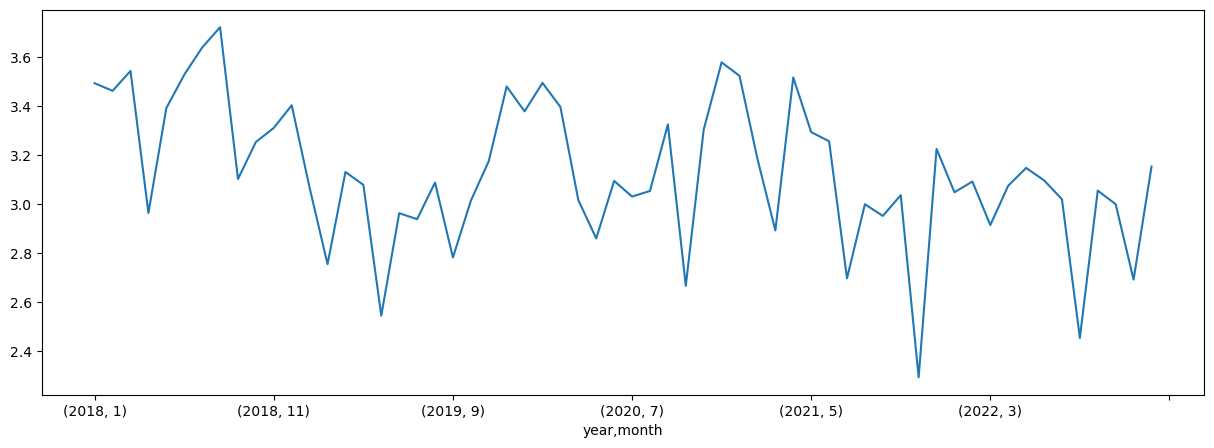

In [103]:
col = "job_culture_rating"
df[df[col] != 0].groupby(["year", "month"])[col].mean().plot( figsize=(15, 5))

/tmp/ipykernel_11903/1912766848.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby([ 'year', 'month'])['job_security_and_advancement_rating', "job_work_and_life_balance_rating",


<Axes: xlabel='year,month'>

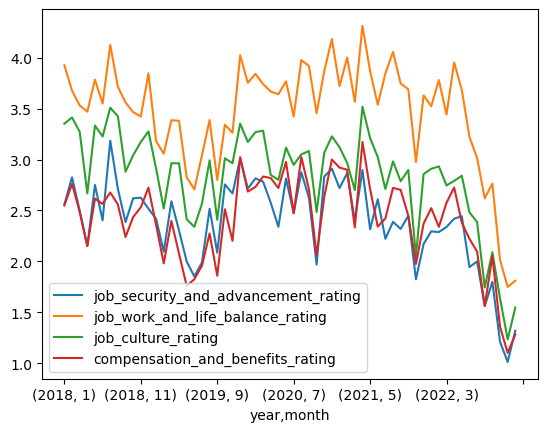

In [67]:
df.groupby([ 'year', 'month'])['job_security_and_advancement_rating', "job_work_and_life_balance_rating",
                               "job_culture_rating", "compensation_and_benefits_rating"].mean().plot()

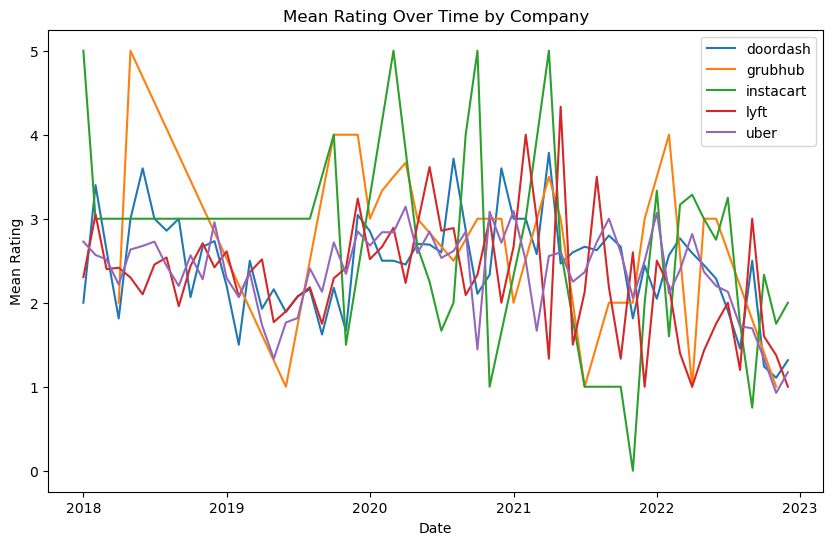

In [68]:
mean_rating = df.groupby(['company', 'year', 'month'])[col].mean().reset_index()

# generate a datetime for plotting
mean_rating['date'] = pd.to_datetime(mean_rating[['year', 'month']].assign(day=1))

# create a list of companies
companies = mean_rating['company'].unique()

# plot
plt.figure(figsize=(10,6))

for company in companies:
    company_data = mean_rating[mean_rating['company'] == company]
    plt.plot_date(company_data['date'], company_data[col], '-', label=company)

plt.title('Mean Rating Over Time by Company')
plt.xlabel('Date')
plt.ylabel('Mean Rating')
plt.legend()
plt.show()